In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

base_path = "/content/drive/MyDrive/rice_img"

train_dir = [
    os.path.join(base_path, "Bacterialblight/train"),
    os.path.join(base_path, "Bacterialblight/TRAIN"),
    os.path.join(base_path, "Blast/train"),
    os.path.join(base_path, "Tungro/train")
]

val_dir = [
    os.path.join(base_path, "Bacterialblight/validation"),
    os.path.join(base_path, "Blast/validation"),
    os.path.join(base_path, "Tungro/validation"),
    os.path.join(base_path, "Tungro/valdation")
]

test_dir = [
    os.path.join(base_path, "Bacterialblight/test"),
    os.path.join(base_path, "Blast/test"),
    os.path.join(base_path, "Tungro/test")
]

img_size = (224,224)
batch_size = 32


datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    classes=['Bacterialblight/train','Blast/train','Tungro/train'],
    class_mode='categorical',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    classes=['Bacterialblight/validation','Blast/validation','Tungro/validation'],
    class_mode='categorical',
    shuffle=False
)

test_gen = datagen.flow_from_directory(
    base_path,
    target_size=img_size,
    batch_size=batch_size,
    classes=['Bacterialblight/test','Blast/test','Tungro/test'],
    class_mode='categorical',
    shuffle=False
)

class_names = ["Bacterial blight", "Blast", "Tungro"]
print("Classes:", class_names)


base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()


y_true = test_gen.classes
y_pred = model.predict(test_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


KeyError: 'train'

Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Classes: ['Bacterialblight', 'Blast', 'Tungro']
Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1254s 11s/step - accuracy: 0.4564 - loss: 1.1422 - val_accuracy: 0.7362 - val_loss: 0.6526
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 197ms/step - accuracy: 0.7010 - loss: 0.6702 - val_accuracy: 0.8272 - val_loss: 0.4473
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.7954 - loss: 0.5002 - val_accuracy: 0.8848 - val_loss: 0.3432
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 195ms/step - accuracy: 0.8314 - loss: 0.4144 - val_accuracy: 0.9032 - val_loss: 0.2851
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.8642 - loss: 0.3335 - val_accuracy: 0.9217 - val_loss: 0.2459
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.8885 - loss: 0.2946 - val_accuracy: 0.9286 - val_loss: 0.2189
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 183ms/step - accuracy: 0.9020 - loss: 0

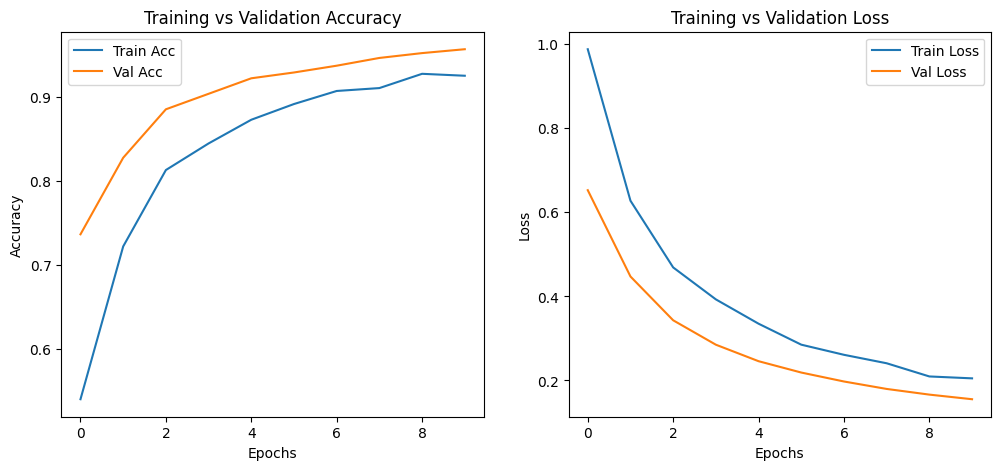

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step

Classification Report (Validation Set):
                 precision    recall  f1-score   support

Bacterialblight       0.93      0.96      0.94       316
          Blast       0.95      0.92      0.94       291
         Tungro       1.00      1.00      1.00       261

       accuracy                           0.96       868
      macro avg       0.96      0.96      0.96       868
   weighted avg       0.96      0.96      0.96       868



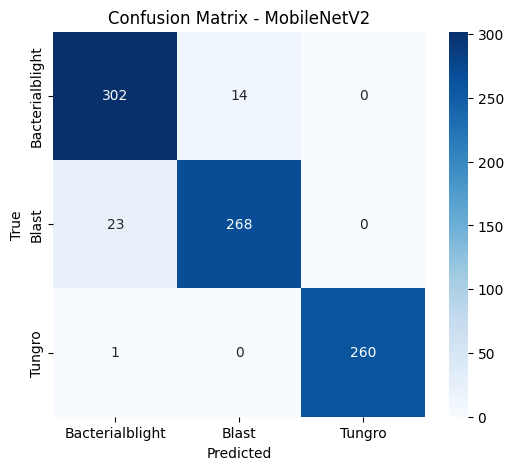

In [ ]:

# Rice Dataset Baseline: MobileNetV2

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


dataset_dir = "/content/drive/MyDrive/rice_img"

img_size = (224,224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation",
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)


base = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()


y_true = val_gen.classes
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report (Validation Set):")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - MobileNetV2")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Classes: ['Bacterialblight', 'Blast', 'Tungro']
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 132s 990ms/step - accuracy: 0.3569 - loss: 1.1155 - val_accuracy: 0.3641 - val_loss: 1.0958
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 78s 718ms/step - accuracy: 0.3508 - loss: 1.1064 - val_accuracy: 0.3641 - val_loss: 1.0968
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 78s 710ms/step - accuracy: 0.3517 - loss: 1.1031 - val_accuracy: 0.3641 - val_loss: 1.0961
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 722ms/step - accuracy: 0.3408 - loss: 1.1070 - val_accuracy: 0.3353 - val_loss: 1.0990
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 727ms/step - accuracy: 0.3505 - loss: 1.1081 - val_accuracy: 0.3641 - val_loss: 1.0957
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 722ms/step - accuracy: 0.3284 - loss: 1.1198 - val_accuracy: 0.3641 - val_loss: 1.0972
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 77s 708ms/step - accuracy: 0.3506 - loss: 1.1087 - val_accuracy: 0.3641 - val_loss: 1.0961
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 79s 721ms/step - accuracy: 0.3455 - loss: 

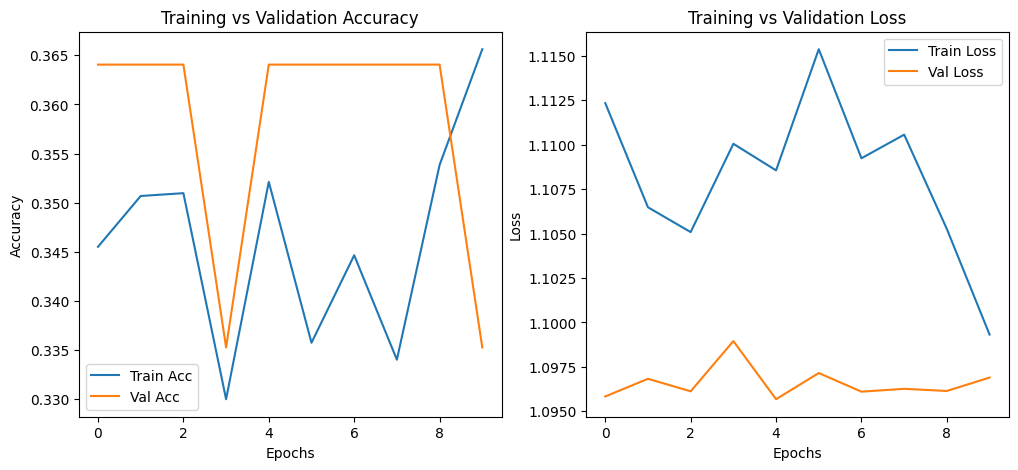

28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 822ms/step

Classification Report (Validation Set):
                 precision    recall  f1-score   support

Bacterialblight       0.00      0.00      0.00       316
          Blast       0.34      1.00      0.50       291
         Tungro       0.00      0.00      0.00       261

       accuracy                           0.34       868
      macro avg       0.11      0.33      0.17       868
   weighted avg       0.11      0.34      0.17       868



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


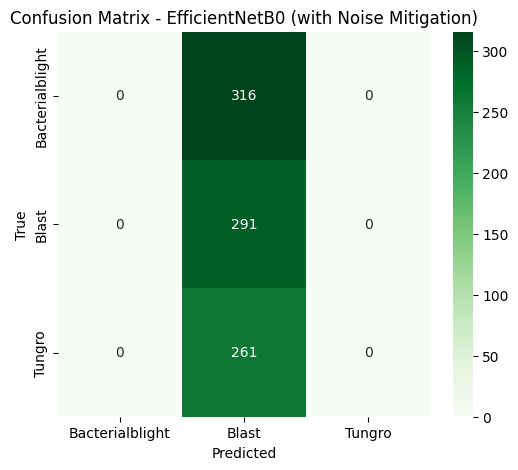

In [ ]:

# Rice Dataset Baseline: EfficientNetB0 with Preprocessing

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2


def denoise_img(img):

    img = (img * 255).astype(np.uint8)
    # Apply median filter to reduce noise
    img = cv2.medianBlur(img, 3)

    return img.astype(np.float32) / 255.0


dataset_dir = "/content/drive/MyDrive/rice_img"

img_size = (224,224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    preprocessing_function=denoise_img
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation",
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)


base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()
-
y_true = val_gen.classes
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report (Validation Set):")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - EfficientNetB0 (with Noise Mitigation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Found 3479 images belonging to 3 classes.
Found 868 images belonging to 3 classes.
Classes: ['Bacterialblight', 'Blast', 'Tungro']


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 117s 886ms/step - accuracy: 0.3460 - loss: 1.1075 - val_accuracy: 0.3641 - val_loss: 1.0964
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 77s 709ms/step - accuracy: 0.3471 - loss: 1.1061 - val_accuracy: 0.3641 - val_loss: 1.0962
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 689ms/step - accuracy: 0.3468 - loss: 1.1027 - val_accuracy: 0.3641 - val_loss: 1.0971
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 687ms/step - accuracy: 0.3443 - loss: 1.1096 - val_accuracy: 0.3641 - val_loss: 1.0958
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 76s 695ms/step - accuracy: 0.3437 - loss: 1.1115 - val_accuracy: 0.3641 - val_loss: 1.0965
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 74s 681ms/step - accuracy: 0.3516 - loss: 1.1078 - val_accuracy: 0.3641 - val_loss: 1.0956
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 693ms/step - accuracy: 0.3486 - loss: 1.1029 - val_accuracy: 0.3641 - val_loss: 1.0956
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 74s 684ms/step - accuracy: 0.3311 - loss: 

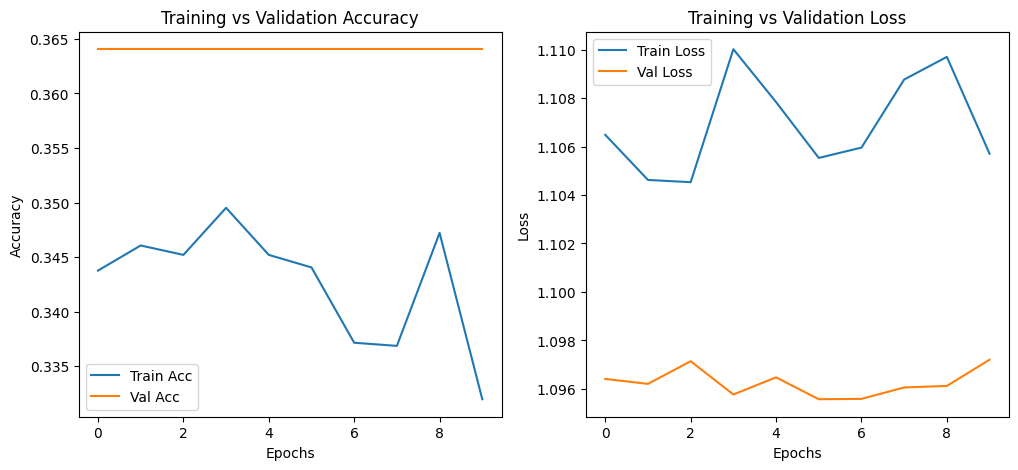

28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 776ms/step

Classification Report (Validation Set):
                 precision    recall  f1-score   support

Bacterialblight       0.36      1.00      0.53       316
          Blast       0.00      0.00      0.00       291
         Tungro       0.00      0.00      0.00       261

       accuracy                           0.36       868
      macro avg       0.12      0.33      0.18       868
   weighted avg       0.13      0.36      0.19       868



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


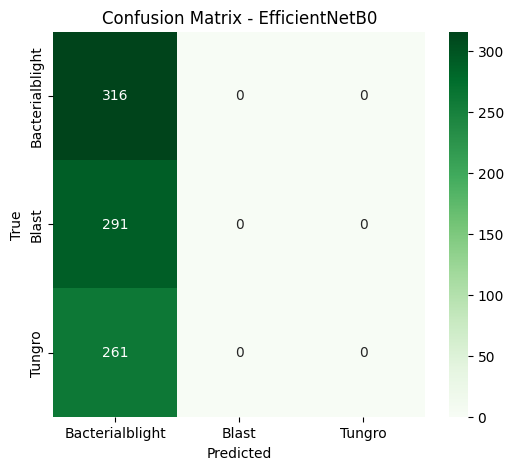

In [ ]:
# Rice Dataset Baseline: EfficientNetB0 (No Noise Reduction)
# ===============================
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ------------------------
# 1. Dataset Preparation
# ------------------------
dataset_dir = "/content/drive/MyDrive/rice_img"   # dataset root

img_size = (224,224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation",
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())
print("Classes:", class_names)

# ------------------------
# 2. EfficientNetB0 Model
# ------------------------
base = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224,224,3))
base.trainable = False

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)


plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()


y_true = val_gen.classes
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report (Validation Set):")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - EfficientNetB0")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
